In [26]:
import pandas as pd

url = "https://raw.githubusercontent.com/phamdinhkhanh/datasets/master/Churn_Modelling.csv"

df = pd.read_csv(url, header=0, index_col='RowNumber')

df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [27]:
df.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [28]:
df.groupby('Geography')['CreditScore'].mean()

Geography
France     649.668329
Germany    651.453567
Spain      651.333872
Name: CreditScore, dtype: float64

In [67]:
import numpy as np
labels = ['Group 1', 'Group 2', 'Group 3', 'Group 4', 'Group 5']
df['Group'] = pd.qcut(df['Age'], q = 5, labels=labels)
df[['Age', 'Group']].sort_values(['Group', 'Age'], ascending=True).head()
df['Group'].value_counts().sort_index()

Group
Group 1    2372
Group 2    1781
Group 3    2266
Group 4    1696
Group 5    1885
Name: count, dtype: int64

C:\Users\CHANH\AppData\Local\Temp\ipykernel_3808\3685972669.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('Group').size().plot.pie(autopct='%1.1f%%', startangle=90, counterclock=False)


<Axes: >

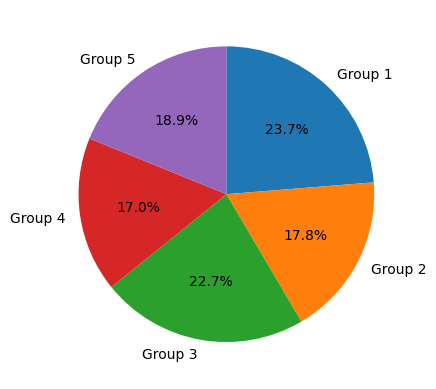

In [78]:
import matplotlib.pyplot as plt
df.groupby('Group').size().plot.pie(autopct='%1.1f%%', startangle=90, counterclock=False)